# Deconvolution of Downsampled "Hollow Bars" Synthetic Dataset

Deconvolution of [Hollow Bars](http://bigwww.epfl.ch/deconvolution/bars/) dataset

**Reference**<br>
D. Sage, L. Donati, F. Soulez, D. Fortun, G. Schmit, A. Seitz, R. Guiet, C. Vonesch, M. Unser<br>
DeconvolutionLab2: An Open-Source Software for Deconvolution Microscopy<br>
Methods - Image Processing for Biologists, 115, 2017.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from flowdec.nb import utils as nbutils 
from flowdec import data as fd_data

Load an acquired image based on a simulated convolution of a known ground-truth and a theoretical PSF:

In [2]:
# Load volume downsampled to 25%
acq = fd_data.bars_25pct()
acq.shape()

{'actual': (32, 64, 64), 'data': (32, 64, 64), 'kernel': (32, 64, 64)}

Plot a few rotations of this 3D volume along each axis (i.e. XY, YZ, XZ):

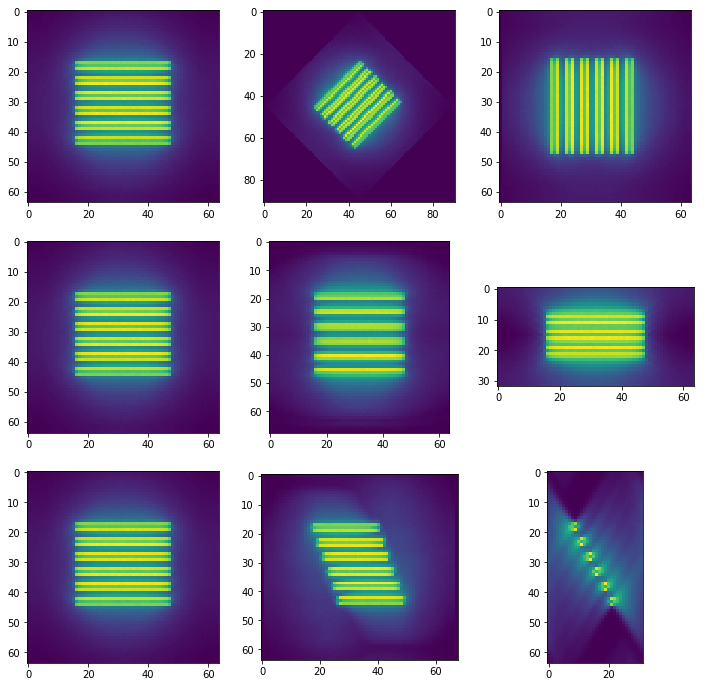

In [3]:
nbutils.plot_rotations(acq.data)

Run deconvolution on the blurred image and verify that the results are clearer:

In [7]:
import tensorflow as tf
from flowdec import restoration as fd_restoration

res = fd_restoration.richardson_lucy(
    acq, niter=25, 
    # Disable GPUs for this since on windows at least, repeat runs of TF graphs
    # on GPUs in a jupyter notebook do not go well (crashes with mem allocation errors)
    session_config=tf.ConfigProto(device_count={'GPU': 0})
)
res.shape

(32, 64, 64)

Plot the same rotations for the resulting deconvolved volume:

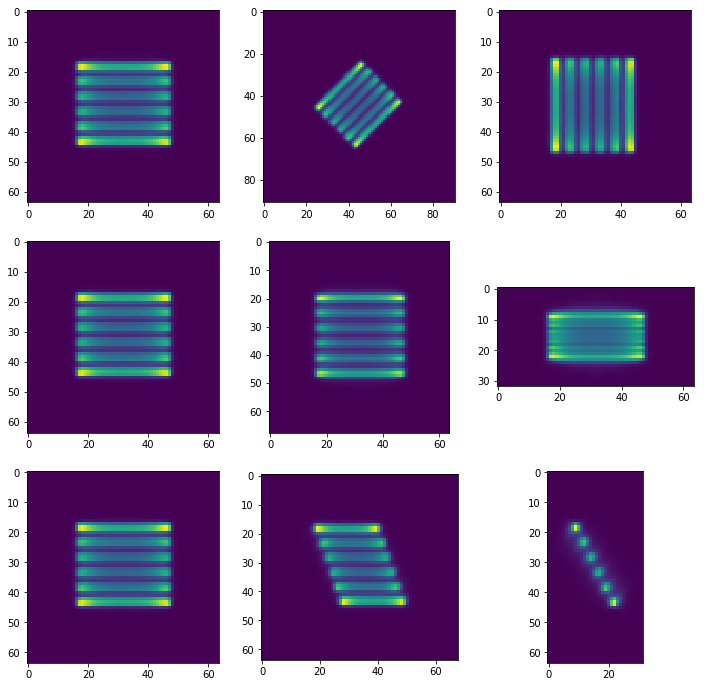

In [11]:
nbutils.plot_rotations(res)